### Top 10 and Bottom 10 Airports by Average Arrival Delay

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the training dataset
df = pd.read_csv("Data_from_zindi/Train.csv")
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [3]:
# 1. Calculate the average delay per destination airport
avg_delay_per_airport = df.groupby('ARRSTN')['target'].mean().sort_values(ascending=False)

# 2. Select Top 10 and Bottom 10 airports by average delay
top10_airports = avg_delay_per_airport.head(10)
bottom10_airports = avg_delay_per_airport.tail(10)

In [4]:
top10_airports

ARRSTN
RTM    389.285714
TMR    382.000000
ESB    355.000000
VOG    178.000000
RAK    140.000000
AYT    137.666667
GHA    130.000000
LIL    112.800000
NKC     95.457045
VKO     90.920635
Name: target, dtype: float64

In [5]:
bottom10_airports

ARRSTN
JIB    0.0
BRI    0.0
MVB    0.0
SJJ    0.0
TPS    0.0
GNB    0.0
LBV    0.0
OTP    0.0
LAD    0.0
BYJ    0.0
Name: target, dtype: float64

In [6]:
arrival_counts = df['ARRSTN'].value_counts()
print(arrival_counts.loc[bottom10_airports.index])

ARRSTN
JIB    1
BRI    1
MVB    1
SJJ    8
TPS    1
GNB    1
LBV    1
OTP    1
LAD    1
BYJ    2
Name: count, dtype: int64


In [7]:
# top10 havaalanları için uçuş sayılarını kontrol et
print(arrival_counts.loc[top10_airports.index])

ARRSTN
RTM      7
TMR      1
ESB      1
VOG      2
RAK      1
AYT     24
GHA      1
LIL     30
NKC    291
VKO     63
Name: count, dtype: int64


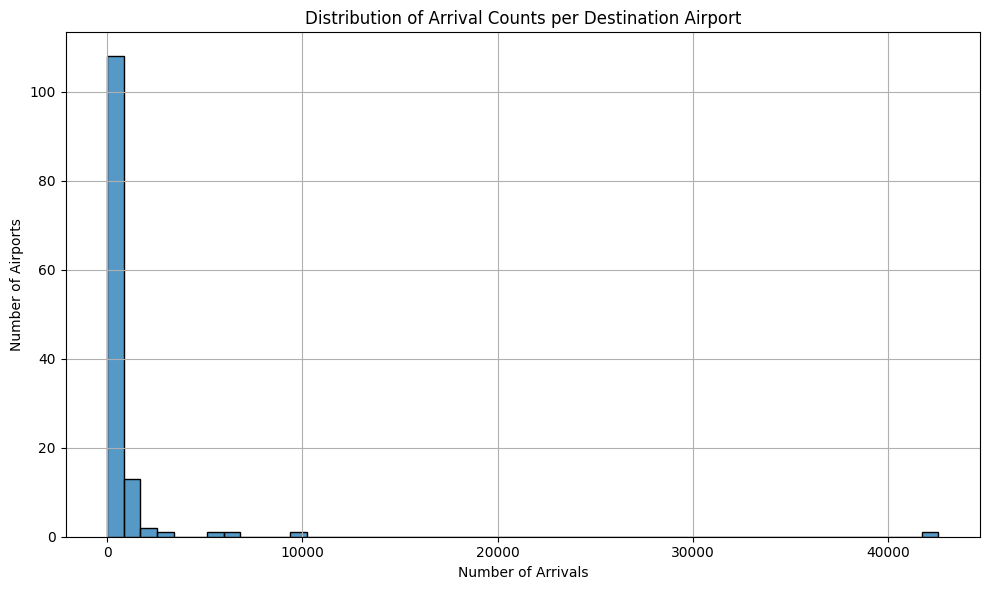

count      128.000000
mean       842.445312
std       3916.569049
min          1.000000
25%          3.750000
50%        105.000000
75%        535.500000
max      42572.000000
Name: count, dtype: float64


In [8]:
# 1. Calculate arrival counts per airport
arrival_counts = df['ARRSTN'].value_counts()

# 2. Plot histogram of arrival counts
plt.figure(figsize=(10, 6))
sns.histplot(arrival_counts, bins=50, kde=False)
plt.title('Distribution of Arrival Counts per Destination Airport')
plt.xlabel('Number of Arrivals')
plt.ylabel('Number of Airports')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Display basic stats to help decide a threshold
print(arrival_counts.describe())

In [10]:
# 1. Filter for high-traffic destination airports (≥ 100 arrivals)
min_arrivals = 100
high_traffic_airports = arrival_counts[arrival_counts >= min_arrivals].index

# 2. Filter the main DataFrame
df_high_traffic = df[df['ARRSTN'].isin(high_traffic_airports)]

# 3. Calculate average delay per destination airport
avg_delay_per_airport = df_high_traffic.groupby('ARRSTN')['target'].mean().sort_values(ascending=False)

# 4. Select top 10 and bottom 10 airports by average delay
top10_airports = avg_delay_per_airport.head(10)
bottom10_airports = avg_delay_per_airport.tail(10)

# 5. Display
print("Top 10 Airports by Average Delay:\n", top10_airports)
print("\nBottom 10 Airports by Average Delay:\n", bottom10_airports)

Top 10 Airports by Average Delay:
 ARRSTN
NKC    95.457045
IST    89.351595
BKO    86.353933
CZL    85.692308
CDG    78.384948
CKY    74.101124
MED    73.221374
JED    71.655867
DKR    70.841432
NIM    70.664653
Name: target, dtype: float64

Bottom 10 Airports by Average Delay:
 ARRSTN
DUS    31.446450
FRA    31.190131
BRU    30.730124
LGW    30.685714
BUD    27.456647
MLA    17.657971
PMO    15.210884
GAE     6.863014
GAF     2.033898
NAP     1.939759
Name: target, dtype: float64


Top 10 and Bottom 10 Destination Airports by Average Delay (High-Traffic Only)

✅ Improved Validity: By filtering to airports with at least 100 arrivals, we avoid drawing conclusions from airports with too few flights.

✈️ Top 10 Airports such as NKC, IST, and BKO show the highest average arrival delays — over 85 minutes in some cases.

🟢 Bottom 10 airports like NAP, GAF, and GAE show the lowest average delays, some even below 10 minutes.

📊 Conclusion: This filtered approach provides a more realistic comparison of delay performance among frequently used airports.

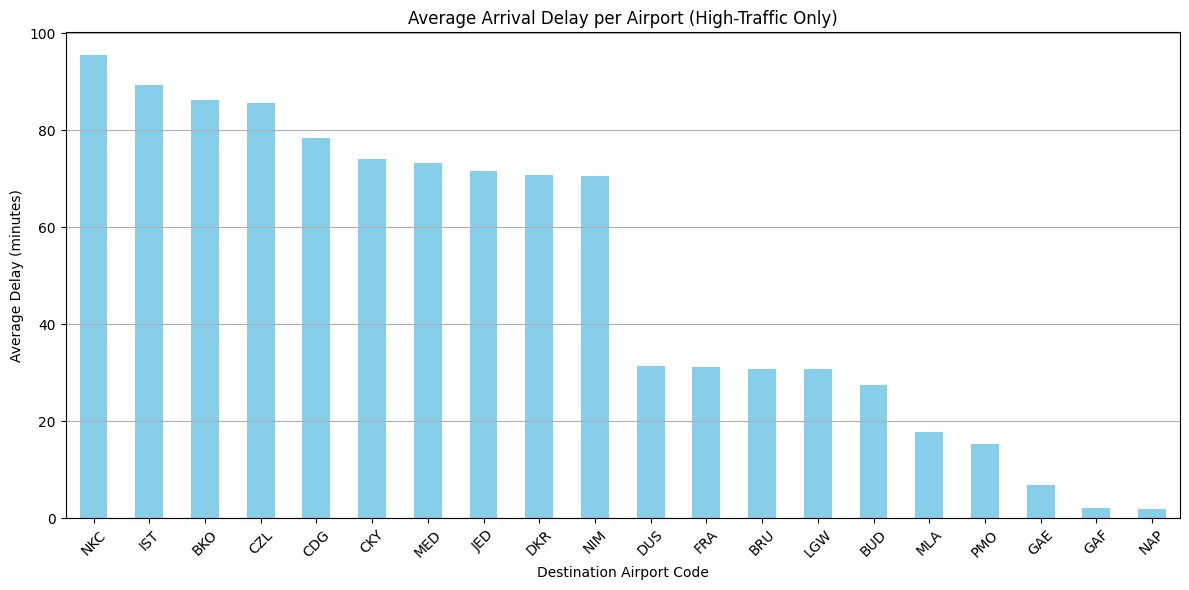

In [11]:
import matplotlib.pyplot as plt

# 1. Combine top and bottom 10 into a single Series
combined_airports = pd.concat([
    top10_airports.rename("Average Delay").sort_values(ascending=False),
    bottom10_airports.rename("Average Delay").sort_values(ascending=False)
])

# 2. Plot bar chart
plt.figure(figsize=(12, 6))
combined_airports.plot(kind='bar', color='skyblue')

# 3. Customize the plot
plt.title('Average Arrival Delay per Airport (High-Traffic Only)')
plt.xlabel('Destination Airport Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Top 10 and Bottom 10 Airports by Average Departure Delay

In [12]:
departure_counts = df['DEPSTN'].value_counts()

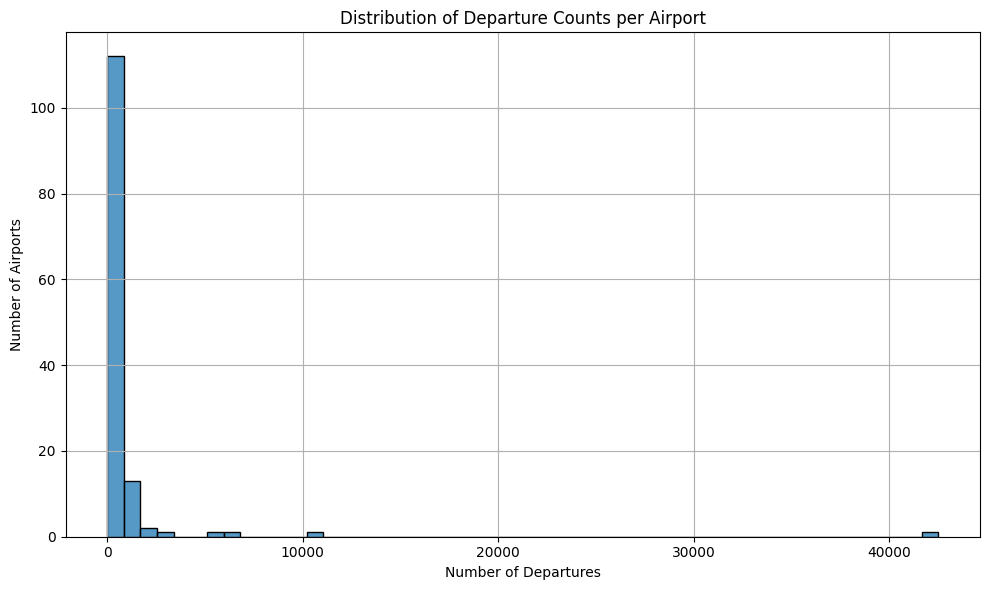

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(departure_counts, bins=50, kde=False)
plt.title('Distribution of Departure Counts per Airport')
plt.xlabel('Number of Departures')
plt.ylabel('Number of Airports')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
print(departure_counts.describe())

count      132.000000
mean       816.916667
std       3855.784434
min          1.000000
25%          2.000000
50%         87.500000
75%        529.500000
max      42522.000000
Name: count, dtype: float64


In [16]:
# 1. Filter for high-traffic departure airports (≥ 100 departures)
min_departure = 100
high_traffic_departures = departure_counts[departure_counts >= min_departure].index

# 2. Filter the main DataFrame
df_high_dep = df[df['DEPSTN'].isin(high_traffic_departures)]

# 3. Calculate average delay per departure airport
avg_delay_per_dep_airport = df_high_dep.groupby('DEPSTN')['target'].mean().sort_values(ascending=False)

# 4. Select Top 10 and Bottom 10 airports by average delay
top10_dep_airports = avg_delay_per_dep_airport.head(10)
bottom10_dep_airports = avg_delay_per_dep_airport.tail(10)

# 5. Display
print("Top 10 Departur Airports by Average Delay:\n", top10_dep_airports)
print("\nBottom 10 Departure Airports by Average Delay:\n", bottom10_dep_airports)

Top 10 Departur Airports by Average Delay:
 DEPSTN
CZL    112.989744
NKC    110.587031
DSS    100.731013
BKO     95.932584
JED     95.756591
IST     95.541609
CKY     91.666667
DKR     90.596939
ORN     81.521277
CDG     81.201214
Name: target, dtype: float64

Bottom 10 Departure Airports by Average Delay:
 DEPSTN
NBE    31.643791
BEY    30.625000
DJE    28.301014
PMO    24.986395
NDR    21.897233
OUD    16.644970
GAE     7.361842
MLA     5.394737
NAP     2.911647
GAF     0.233333
Name: target, dtype: float64


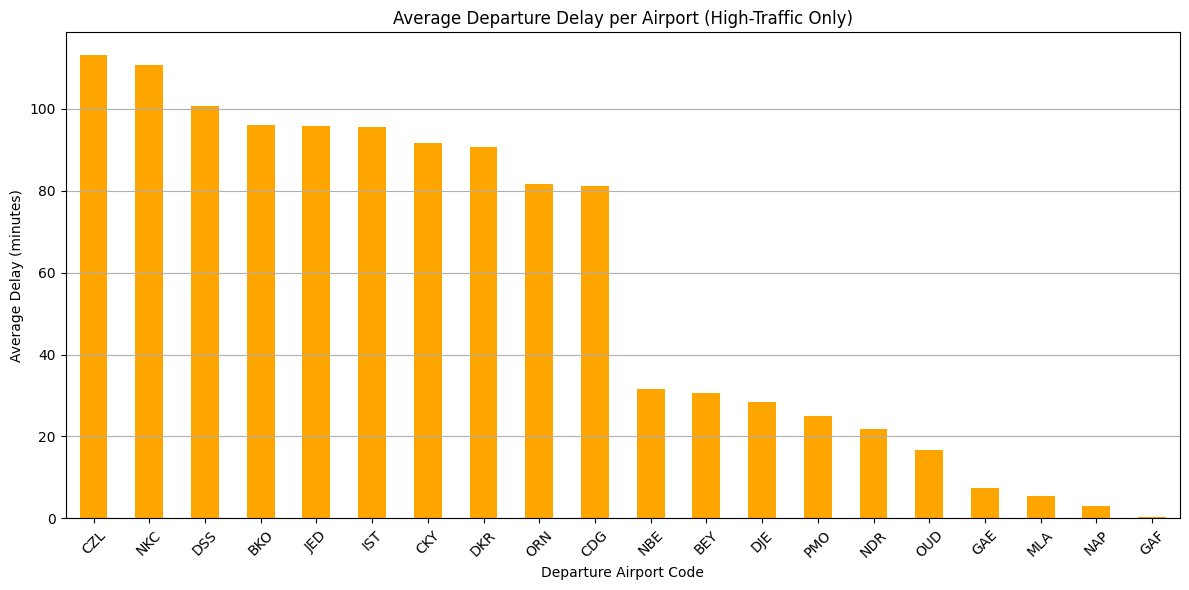

In [17]:

# 6. Combine into one Series for plotting

combined_dep_airports = pd.concat([
    top10_dep_airports.rename("Average Delay").sort_values(ascending=False),
    bottom10_dep_airports.rename("Average Delay").sort_values(ascending=False)
])

# 7. Plot
plt.figure(figsize=(12,6))
combined_dep_airports.plot(kind='bar', color='orange')
plt.title('Average Departure Delay per Airport (High-Traffic Only)')
plt.xlabel('Departure Airport Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Top 10 and Bottom 10 Departure Airports by Average Delay (High-Traffic Only)
✅ Improved Reliability: By focusing on airports with at least 100 departures, we exclude low-frequency cases that could distort the results.

✈️ Top 10 Airports like CZL, NKC, and DSS exhibit the highest average departure delays — often exceeding 100 minutes.

🟢 Bottom 10 Airports such as NAP, GAF, and MLA show the lowest departure delays, some of which are under 5 minutes.

📌 Conclusion: This filtered analysis enables a more fair comparison of departure performance across airports with substantial traffic.

Airports such as **JED** and **NKC** show consistently high delays in both arrivals and departures, signaling broader operational inefficiencies. In contrast, **NAP** and **GAF** perform well in both categories, indicating strong overall punctuality.